In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
dataset = pd.read_csv('advertising.csv')

In [43]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


no null values

In [45]:
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

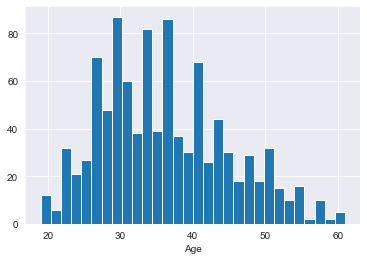

In [46]:
#Age histogram
#sns.set_style("dark")
dataset["Age"].hist(bins=30)
plt.xlabel("Age")

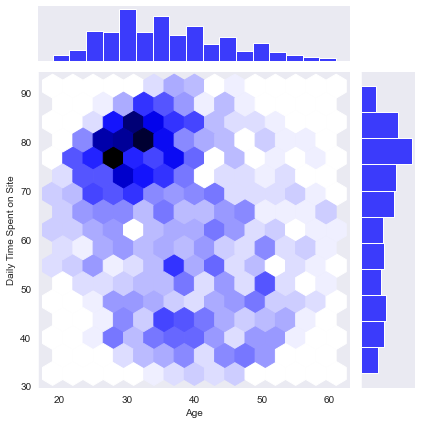

In [54]:
#Age vs Daily time spent on site
sns.jointplot(x="Age", y= 'Daily Time Spent on Site', data=dataset,color='blue',kind='hex')

User between the age 20 and 40 years spend more time on the website. Therefore, the advertisement should be for age group between 20 to 40

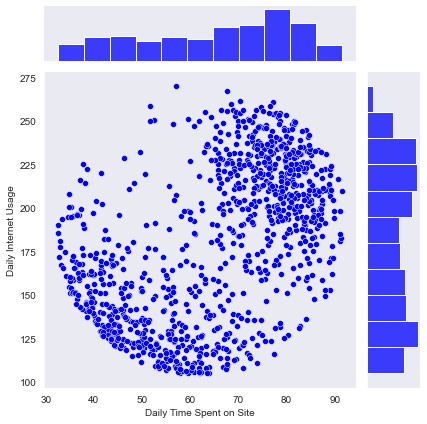

In [56]:
#Daily time spent on site vs daily internet usage
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=dataset,color='blue')

user who spend more time on internet , spend more time on the website

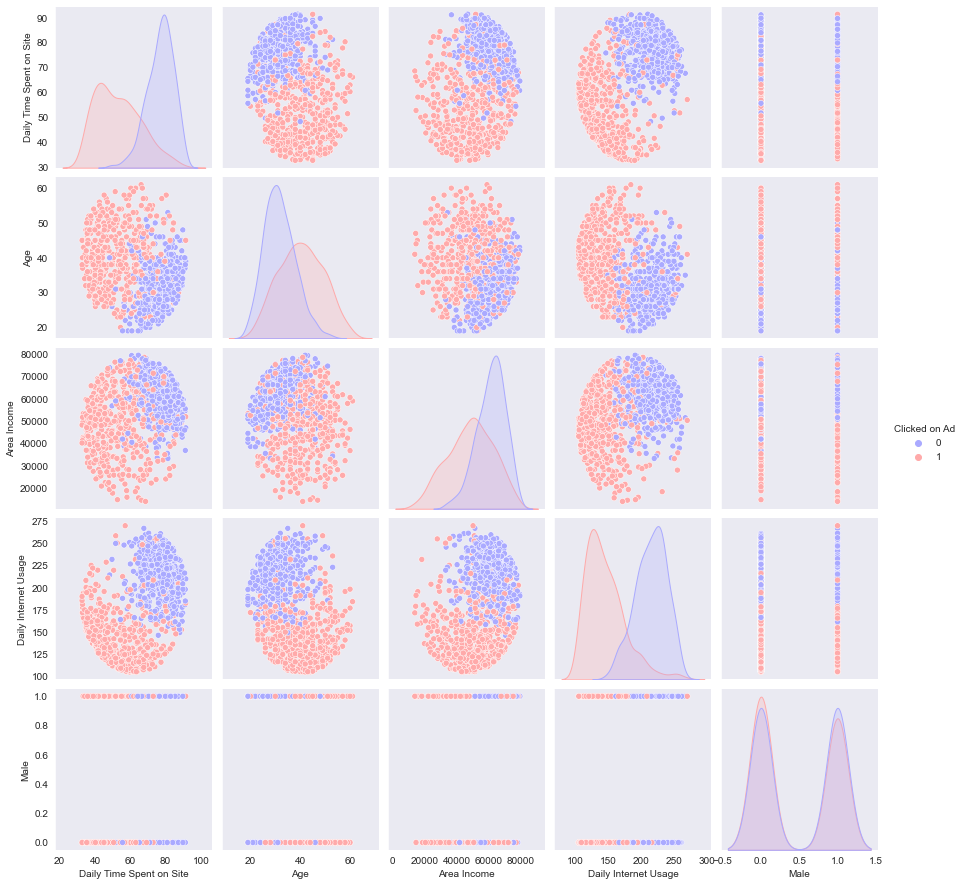

In [67]:
#pairplot
sns.pairplot(dataset,hue='Clicked on Ad',palette='bwr')
# hue seperate people who clciked and who does not click on add

In [75]:
#Ad Topic Line, City and Country
variables = ['Ad Topic Line', 'City', 'Country']
dataset[variables].describe()

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Networked regional Local Area Network,Williamsport,France
freq,1,3,9


ad topic line has 1000(all) unique values
city  has 969 unique values 
country has 237 unique values
there are too many unique values in 'ad topic line' and 'city'. So there is no data pattern in these.for country frequency is 9 and it is not that dominant. So we can exclude these three columns 

In [73]:
#train and test
from sklearn.model_selection import train_test_split
X = dataset[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']] # feature columns
y = dataset['Clicked on Ad'] 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
print("Original shape of dataset: {}".format(dataset.shape)) # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape)) # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape)) # shape of testing dataset after split

Original shape of dataset: (1000, 10)
Shape of training dataset: (670, 5)
Shape of testing dataset: (330, 5)


In [80]:
# Import the Logistic Regression class from sklear.linear_model
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression() # creating object 'logmodel' for LogisticRegression class
logmodel.fit(X_train,y_train) # Fitting the model

LogisticRegression()

In [84]:
# predict for test data i.e. X_test
predictions = logmodel.predict(X_test) 

In [85]:
predictions

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [86]:
len(predictions)

330

In [87]:
#Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [88]:
print(accuracy_score(y_test,predictions))

0.906060606060606


Accuracy of model is 90.6%